Ahnaf Rafli - 0706022310045

# **Data Preprocess (A)**

Import + Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Column infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Rename Annual Income (k$) column to Annual_Income
df.rename(columns = {'Annual Income (k$)':'Annual_Income'}, inplace = True)

# Rename Spending Score (1-100) column to Spending_Score
df.rename(columns = {'Spending Score (1-100)':'Spending_Score'}, inplace = True)

# Check change
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Check missing values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual_Income,0
Spending_Score,0


In [6]:
# Check dupes
df.duplicated().sum()

np.int64(0)

### **Visualzations**

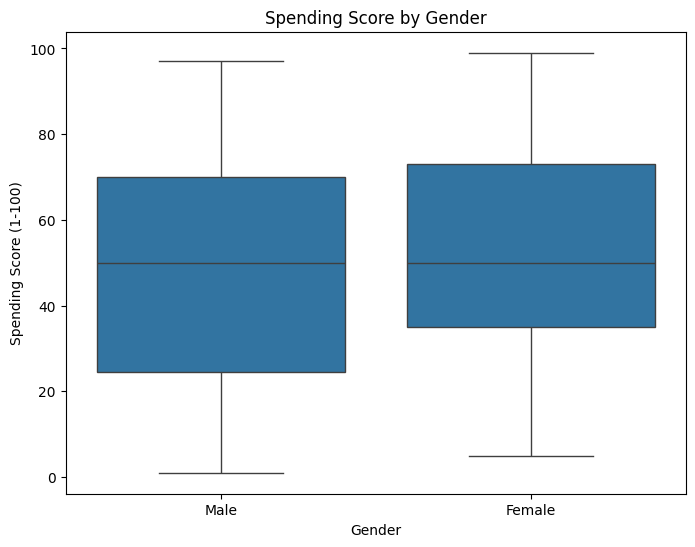

In [8]:
# Data visualization

# Box plot of Spending Score by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending_Score', data=df)
plt.title('Spending Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Box plot of Spending Score by Gender:** It appears that female customers tend to have a slightly higher median spending score compared to male customers. The spread of spending scores also seems similar for both genders, with some

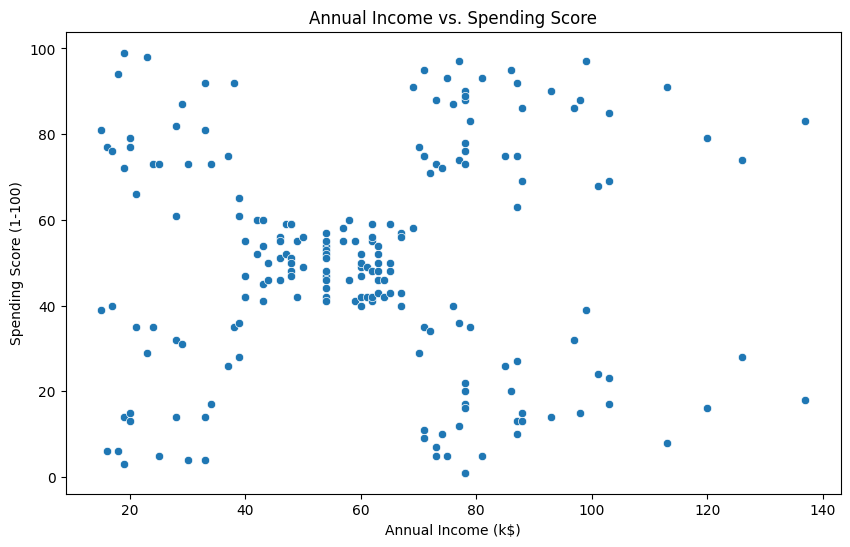

In [9]:
# Scatter plot of Annual Income vs. Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Scatter plot of Annual Income vs. Spending Score:**
- Customers with low annual income and low spending score.
- Customers with low annual income and high spending score.
- Customers with high annual income and low spending score.
- Customers with high annual income and high spending score.
- Customers with medium annual income and medium spending score.

These clusters suggest different customer segments.


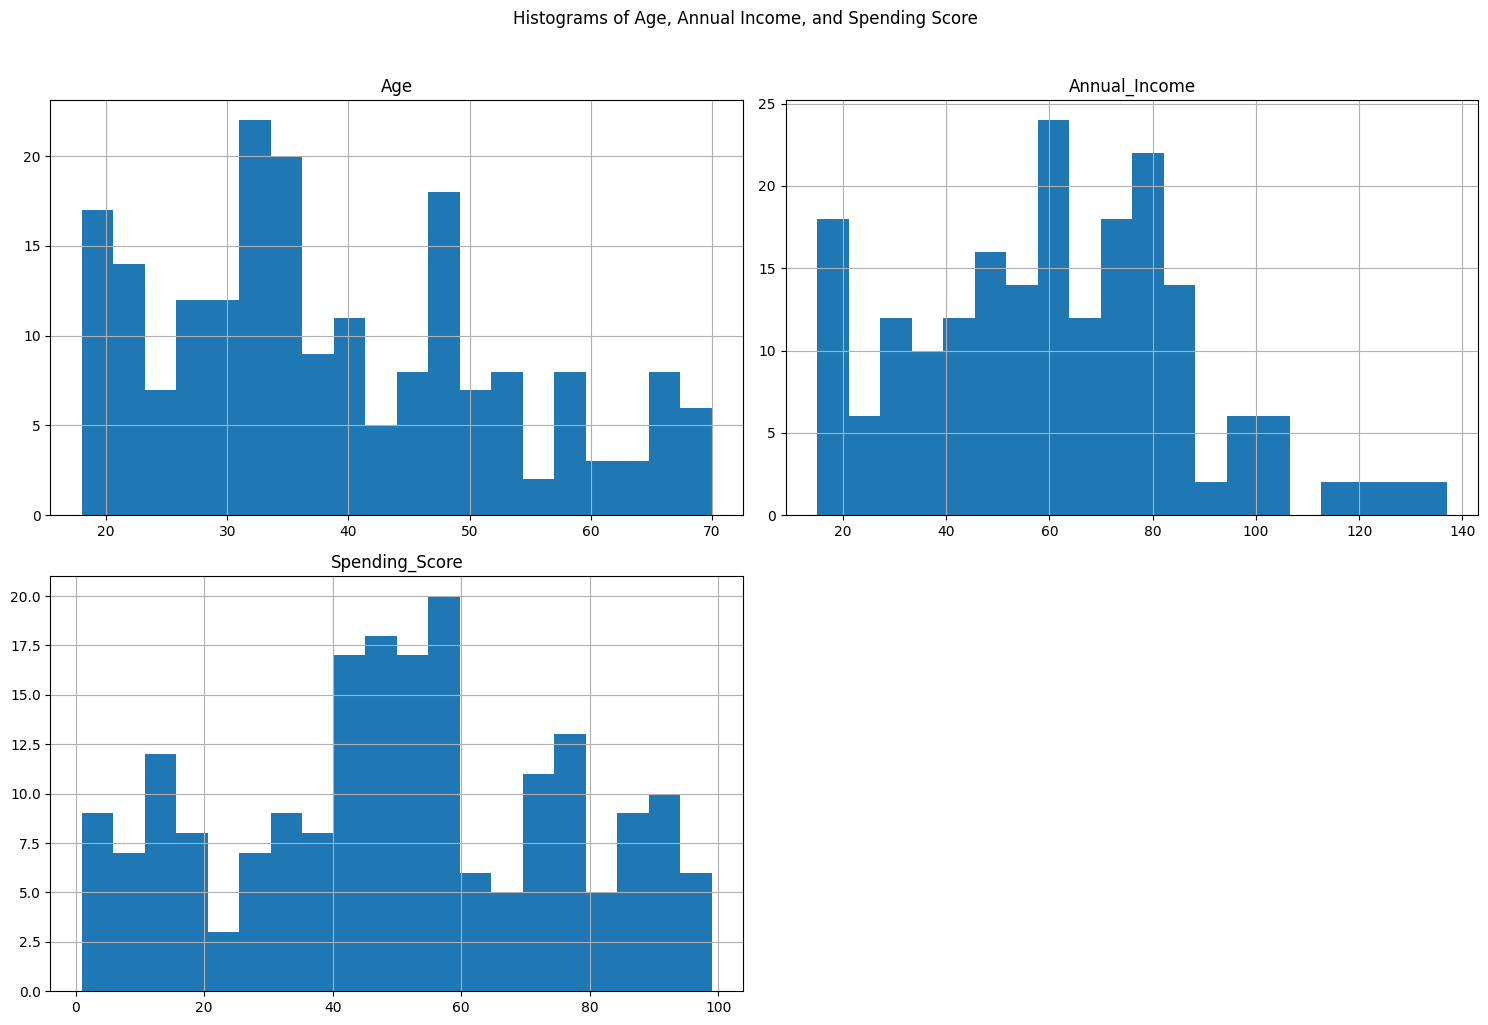

In [10]:
# Histograms for Age, Annual Income, and Spending Score
df[['Age', 'Annual_Income', 'Spending_Score']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Age, Annual Income, and Spending Score', y=1.02)
plt.tight_layout()
plt.show()

**Histograms:**
- Age: The age distribution might be somewhat skewed, possibly with a peak in the 25-45 age range.
- Annual Income: The annual income distribution is likely skewed to the right, with most customers having lower incomes and fewer customers having very high incomes.
- Spending Score: The spending score distribution might be more spread out or even have multiple peaks, reflecting the different spending behaviors seen in the scatter plot.

# **Data Transformation (B)**

Encoding and Scaling

In [11]:
# Copy dataframe for encoding
df_encoded = df.copy()

# Perform one-hot encoding on the 'Gender' column
df_encoded = pd.get_dummies(df_encoded, columns=['Gender'])

# Drop the CustomerID column as it's a unique value
df_encoded = df_encoded.drop('CustomerID', axis=1)

# Display the first few rows of the DataFrame with the new encoded column
display(df_encoded.head())

,Age,Annual_Income,Spending_Score,Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False


**We'll use StandardScaler, Why?**

Since we are measuring distance and using K-Means Clustering, it means that it is less sensitive to the range of the data, and since SC is more robust and generally used.

In [12]:
# Scaling using standard scaler
sc = StandardScaler()
df_encoded[['Age', 'Annual_Income', 'Spending_Score']] = sc.fit_transform(df_encoded[['Age', 'Annual_Income', 'Spending_Score']])

df_encoded.head()

,Age,Annual_Income,Spending_Score,Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,False,True
1,-1.281035,-1.738999,1.195704,False,True
2,-1.352802,-1.700830,-1.715913,True,False
3,-1.137502,-1.700830,1.040418,True,False
4,-0.563369,-1.662660,-0.395980,True,False


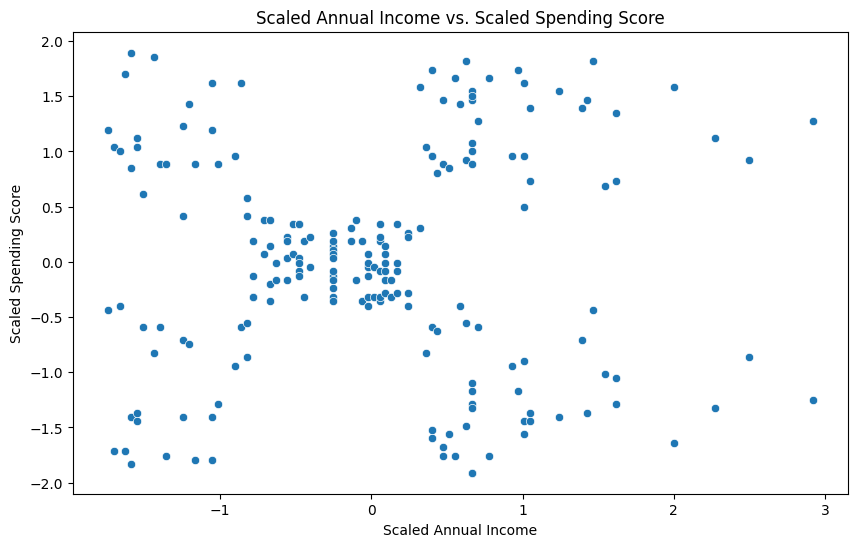

In [13]:
# Scatter plot of scaled Annual Income vs. scaled Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df_encoded)
plt.title('Scaled Annual Income vs. Scaled Spending Score')
plt.xlabel('Scaled Annual Income')
plt.ylabel('Scaled Spending Score')
plt.show()

# **Choosing K (C)**

Elbow Method

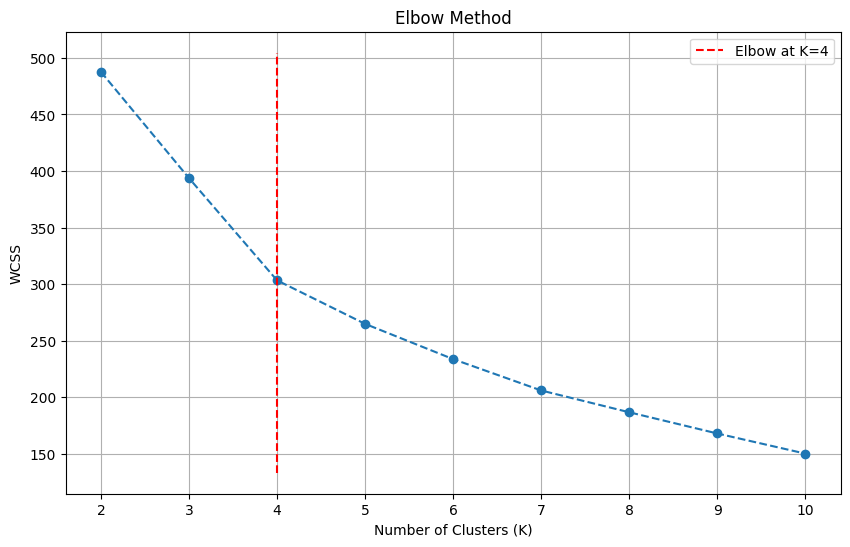

In [15]:
# Select the features for clustering
X = df_encoded[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Female', 'Gender_Male']]

# Calculate WCSS for different values of K
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs K
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.grid(True)

# Use KneeLocator to find the elbow point
kl = KneeLocator(range(2, 11), wcss, curve='convex', direction='decreasing')
elbow_point = kl.elbow

# Highlight the elbow point on the plot
if elbow_point is not None:
    plt.vlines(elbow_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='red', label=f'Elbow at K={elbow_point}')
    plt.legend()

plt.show()

- Based on the Elbow Method, the Within-Cluster Sum of Squares (WCSS) decreases as the number of clusters (K) increases.

- However, the rate of this decrease slows down significantly at a certain point, resembling an "elbow" in the plot. This elbow is observed at K=4. This suggests that adding more than 4 clusters does not provide a substantial reduction in WCSS, indicating diminishing returns in terms of explaining the variance in the data.

-  Therefore, K=4 is selected as the optimal number of clusters because it represents a good balance between minimizing WCSS and keeping the number of clusters manageable and interpretable.

# **Modelling with K-Mean (D)**

Visualizing cluster

In [16]:
# Fit K-Means with the chosen K (K=4)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

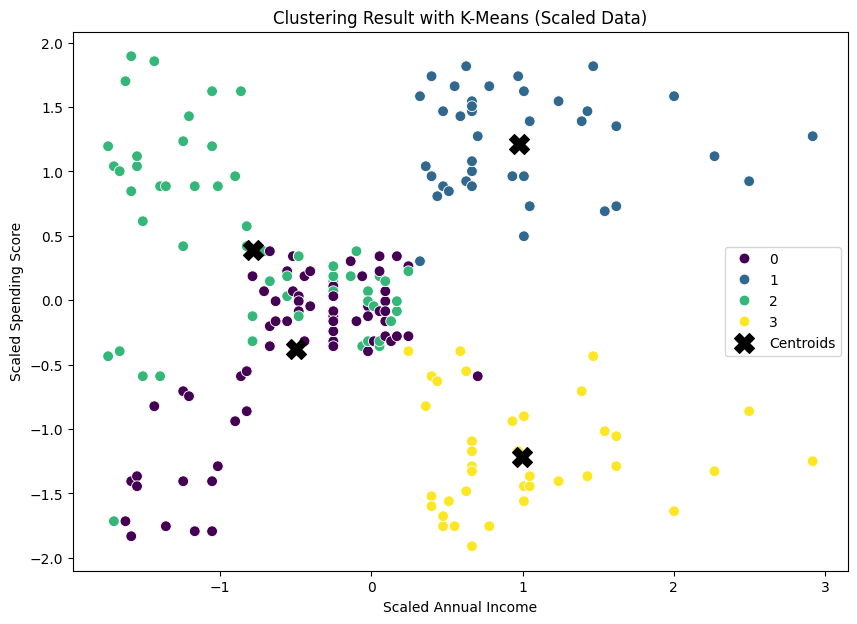

In [17]:
# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the df_encoded DataFrame
df_encoded['Cluster'] = cluster_labels

# Visualize the clusters using a scatter plot of scaled Annual Income vs. Scaled Spending Score
plt.figure(figsize=(10, 7))

sns.scatterplot(x="Annual_Income", y="Spending_Score", hue="Cluster", palette="viridis", data=df_encoded, s=60, legend="full")

# Plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, df_encoded.columns.get_loc('Annual_Income')],
            centroids[:, df_encoded.columns.get_loc('Spending_Score')],
            s=200, c="black", label="Centroids", marker='X')

plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means (Scaled Data)")
plt.legend()
plt.show()

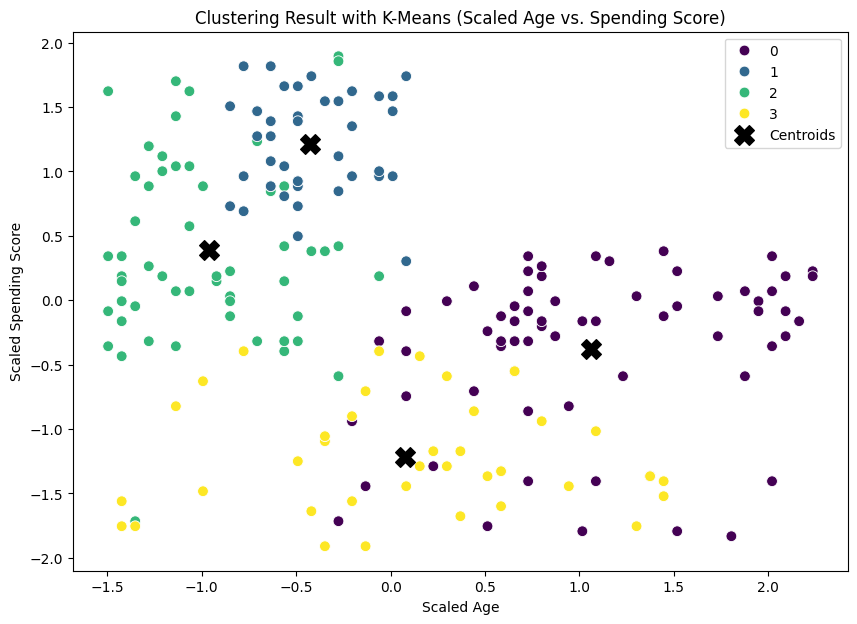

In [19]:
# Visualize the clusters using a scatter plot of scaled Age vs. Scaled Spending Score
plt.figure(figsize=(10, 7))

sns.scatterplot(x="Age", y="Spending_Score", hue="Cluster", palette="viridis", data=df_encoded, s=60, legend="full")

# Plot the cluster centroids
plt.scatter(centroids[:, df_encoded.columns.get_loc('Age')],
            centroids[:, df_encoded.columns.get_loc('Spending_Score')],
            s=200, c="black", label="Centroids", marker='X')

plt.xlabel("Scaled Age")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means (Scaled Age vs. Spending Score)")
plt.legend()
plt.show()

# **Cluster Profiling & Insights (E)**

Cluster Summary Table

In [21]:
# Add the cluster labels to the original df DataFrame if not already added
if 'Cluster' not in df.columns:
    df['Cluster'] = df_encoded['Cluster']

# Group the original data by cluster and calculate summary statistics
cluster_summary = df.groupby('Cluster').agg(
    {
        'Age': ['mean', 'min', 'max'],
        'Annual_Income': ['mean', 'min', 'max'],
        'Spending_Score': ['mean', 'min', 'max'],
        'Gender': lambda x: x.mode()[0] if not x.mode().empty else 'N/A'
    }
)

# Flatten the multi-level column index
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

# Rename the Gender mode column
cluster_summary.rename(columns={'Gender_<lambda>': 'Gender_Mode'}, inplace=True)

# Rename the index for clarity
cluster_summary.index.name = 'Cluster_ID'

# Format the columns
numerical_cols = ['Age_mean', 'Age_min', 'Age_max',
                  'Annual_Income_mean', 'Annual_Income_min', 'Annual_Income_max',
                  'Spending_Score_mean', 'Spending_Score_min', 'Spending_Score_max']

for col in numerical_cols:
    if col in cluster_summary.columns:
        cluster_summary[col] = cluster_summary[col].apply(lambda x: f'{x:.2f}')


# Display the cluster summary table
display(cluster_summary)

,Age_mean,Age_min,Age_max,Annual_Income_mean,Annual_Income_min,Annual_Income_max,Spending_Score_mean,Spending_Score_min,Spending_Score_max,Gender_Mode
Cluster_ID,,,,,,,,,,
0,53.66,35.00,70.00,47.60,18.00,79.00,40.45,3.00,60.00,Female
1,32.88,27.00,40.00,86.10,69.00,137.00,81.53,58.00,97.00,Female
2,25.44,18.00,38.00,40.00,15.00,67.00,60.30,6.00,99.00,Female
3,39.92,19.00,59.00,86.68,67.00,137.00,18.76,1.00,40.00,Male


Based on the `cluster_summary` table, we can interpret the characteristics of each cluster and propose managerial implications:

**Cluster 0:**
*   **Persona:** This cluster appears to consist of older customers with moderate annual income and average spending scores. They are predominantly female.
*   **Managerial Implications:**
    *   **Targeting:** Focus on advertising in channels consumed by older demographics (e.g., print media, daytime television).
    *   **Offer Design:** Offer discounts or loyalty programs tailored to their interests and potentially focus on products or services relevant to their age group.
    *   **Retention:** Build loyalty through personalized communication and excellent customer service.

**Cluster 1:**
*   **Persona:** This segment represents younger to middle-aged customers with high annual income and high spending scores. They are predominantly female. These are likely the mall's most valuable customers.
*   **Managerial Implications:**
    *   **Targeting:** Target through online channels, social media, and potentially luxury brand promotions.
    *   **Offer Design:** Offer exclusive deals, early access to sales, and premium services.
    *   **Retention:** Focus on creating a premium shopping experience and personalized recommendations.

**Cluster 2:**
*   **Persona:** This cluster includes younger customers with low annual income but high spending scores. They are predominantly female. These are likely impulse buyers or those who prioritize spending on experiences.
*   **Managerial Implications:**
    *   **Targeting:** Focus on trendy products, social media marketing, and potentially student discounts or promotions.
    *   **Offer Design:** Offer attractive deals, engaging in-store experiences, and flexible payment options.
    *   **Retention:** Encourage repeat visits through loyalty programs and communication about new arrivals or events.

**Cluster 3:**
*   **Persona:** This segment comprises middle-aged to older customers with high annual income but low spending scores. They are predominantly male. They might be browsing or purchasing necessities rather than luxury items or impulse buys.
*   **Managerial Implications:**
    *   **Targeting:** Focus on value propositions, products related to their interests (e.g., electronics, tools), and potentially target through specific interest groups or online forums.
    *   **Offer Design:** Highlight discounts, bundled deals, and efficient shopping experiences.
    *   **Retention:** Provide a straightforward and convenient shopping experience.